<a href="https://colab.research.google.com/github/vihaankrishna100/AI-Neural-Networks/blob/main/UEC_Stock_AnalysisRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/UECtrain.csv")

In [ ]:
df.head()


,Date,Open,High,Low,Close,Volume
0,10/31/2024,7.66,7.74,7.37,7.42,"6,884,913"
1,10/30/2024,7.95,8.09,7.75,7.78,"4,667,677"
2,10/29/2024,7.99,8.22,7.84,7.99,"6,596,437"
3,10/28/2024,7.74,8.08,7.66,8.03,"5,993,176"
4,10/25/2024,7.92,8.10,7.71,7.73,"6,676,708"


In [ ]:
ir = df[['Open']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

ir_scaled = scaler.fit_transform(ir)
len(df)

183

In [ ]:
ir_training_features = []
ir_training_labels = []
for i in range(30, len(ir_scaled)):
  ir_training_features.append(ir_scaled[i-30:i, 0])
  ir_training_labels.append(ir_scaled[i, 0])

In [ ]:
x_train = np.array(ir_training_features)
y_train = np.array(ir_training_labels)

print(x_train.shape)
print(y_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


(153, 30)
(153,)


In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.models import Model

# Defining the LSTM network
input_layer = Input(shape=(x_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)

lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)

lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)

lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)

# Creating and compiling the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 30, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 30, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 30, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,101 (1.08 MB)

 Trainable params: 282,101 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(x_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1,1)

print(y_train.shape)

model_history = model.fit(x_train, y_train, epochs=100, verbose=1, batch_size=20)

(153, 30, 1)
(153,)
(153, 1)
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - loss: 0.2175
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0760
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0826
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0472
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0358
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0332
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0358
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0364
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0337
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0326
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0295
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.0306
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0279
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0247
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/ste

In [ ]:
df_test = pd.read_csv("/content/UECTest.csv")

df_test.head()


,Date,Open,High,Low,Close,Volume
0,02/10/2025,7.00,7.16,6.88,6.92,"4,317,871"
1,02/07/2025,6.90,7.14,6.85,6.95,"4,272,586"
2,02/06/2025,7.04,7.04,6.73,6.79,"5,901,244"
3,02/05/2025,7.00,7.20,6.96,7.04,"3,677,540"
4,02/04/2025,7.01,7.13,6.91,7.10,"4,862,712"


In [ ]:
ir_test_processed = df_test[['Open']].values

ir_all = pd.concat((df['Open'], df_test['Open']), axis=0)

test_inputs = ir_all[len(ir_all) - len(df_test) - 60:].values
print(test_inputs.shape)

(128,)


In [ ]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

ir_test_features = []
for i in range(30,100):
  ir_test_features.append(test_inputs[i-30:i, 0])

(128, 1)


In [ ]:
x_test = np.array(ir_test_features)
print(x_test.shape)

x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(70, 30)
(70, 30, 1)


In [ ]:
y_pred = model.predict(x_test)
print(y_pred.shape)

y_pred = scaler.inverse_transform(y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step
(70, 1)


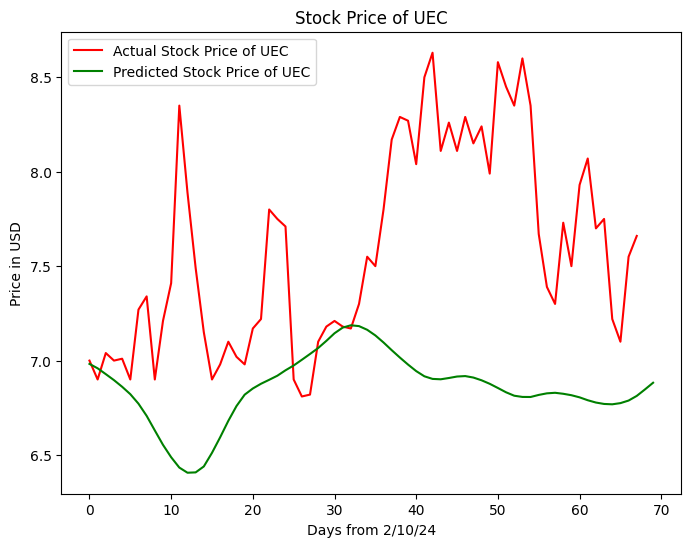

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(ir_test_processed, color='red', label='Actual Stock Price of UEC')
plt.plot(y_pred, color='green', label='Predicted Stock Price of UEC')

plt.title('Stock Price of UEC')
plt.xlabel('Days from 2/10/24')
plt.ylabel('Price in USD')

plt.legend()
plt.show()

Analysis

UEC(Uranium Energy Corp) is a company specializing in uranium mining. This stock recently boomed in the last 1-2 years compared to the measly $2.20 I bought it for in August 2021. This analysis of this stock is slightly off due to high volitility rate of 65.07% in a 100-day period. The predicted values, as shown in the graph, predicted the rise of the price too early, and did not predict the price for the first few days correctly(green graph decreases as actual price increased steeply).
